In [91]:
from gurobipy import *
import numpy as np
import pandas as pd



In [92]:
Data = pd.read_csv('/Users/weiliang/Desktop/project/Veri_1.in',header = None)


Data.columns= ['ID','OrderID','Hour','BitType','Quantity','price','Duration','LinkID']


Data.head()


,ID,OrderID,Hour,BitType,Quantity,price,Duration,LinkID
0,11,1,1,S,-35279.0,0.00,1,NaN
1,11,2,1,S,-39053.0,1.05,1,NaN
2,11,3,1,S,-40828.0,2.27,1,NaN
3,11,4,1,S,-42718.0,4.08,1,NaN
4,11,5,1,S,-44405.0,6.14,1,NaN


In [93]:
Index = []
for i in range(len(Data)):
    if Data['BitType'][i]=='S':
        Index.append(i)
Data_H = Data.iloc[Index]
Data_H = Data_H.reset_index(drop=True)

# Data_H.to_csv('/Users/weiliang/Desktop/project/Data_H.csv')

Data_H.head()


,ID,OrderID,Hour,BitType,Quantity,price,Duration,LinkID
0,11,1,1,S,-35279.0,0.00,1,NaN
1,11,2,1,S,-39053.0,1.05,1,NaN
2,11,3,1,S,-40828.0,2.27,1,NaN
3,11,4,1,S,-42718.0,4.08,1,NaN
4,11,5,1,S,-44405.0,6.14,1,NaN


In [94]:
Index_D = []
Index_S = []
for i in range(len(Data_H)):
    if Data_H['Quantity'][i]<0:
        Index_D.append(i)
    else:
        Index_S.append(i)

Data_H_D = Data_H.iloc[Index_S]
Data_H_D = Data_H_D.reset_index(drop=True)
Data_H_S = Data_H.iloc[Index_D]
Data_H_S = Data_H_S.reset_index(drop=True)


In [95]:
Data_H_SP = Data_H_S
Hour = []
# for i in range(len(Data_H_SP)):
    
#     Data_H_SP['Quantity'][i] = Data_H_S['Quantity'][i]
Data_H_SP['Quantity']=Data_H_SP['Quantity'].abs()
Data_H_SP



,ID,OrderID,Hour,BitType,Quantity,price,Duration,LinkID
0,11,1,1,S,35279.0,0.00,1,NaN
1,11,2,1,S,39053.0,1.05,1,NaN
2,11,3,1,S,40828.0,2.27,1,NaN
3,11,4,1,S,42718.0,4.08,1,NaN
4,11,5,1,S,44405.0,6.14,1,NaN
...,...,...,...,...,...,...,...,...
23995,241,996,24,S,199775.0,1991.26,1,NaN
23996,241,997,24,S,199819.0,1992.96,1,NaN
23997,241,998,24,S,199880.0,1995.33,1,NaN
23998,241,999,24,S,199946.0,1997.90,1,NaN


In [81]:

def Hour_Index(df):
    Index = []
    S = 0
    End = 0
    Hour_list = np.arange(1,25)
    for i in range(24):
        for j in range(len(df)):
            if df['Hour'][j]==Hour_list[i]:
                End = j
        Index.append((S,End))
        S = End+1
    return Index
            
                




In [96]:
HIndex_S=Hour_Index(Data_H_SP)
HIndex_D=Hour_Index(Data_H_D)
HIndex_D

[(0, 999),
 (1000, 1999),
 (2000, 2999),
 (3000, 3999),
 (4000, 4999),
 (5000, 5999),
 (6000, 6999),
 (7000, 7999),
 (8000, 8999),
 (9000, 9999),
 (10000, 10999),
 (11000, 11999),
 (12000, 12999),
 (13000, 13999),
 (14000, 14999),
 (15000, 15999),
 (16000, 16999),
 (17000, 17999),
 (18000, 18999),
 (19000, 19999),
 (20000, 20999),
 (21000, 21999),
 (22000, 22999),
 (23000, 23999)]

In [83]:
Data_H_SP[1000:]

,ID,OrderID,Hour,BitType,Quantity,price,Duration,LinkID
1000,21,1,2,S,110255.0,0.00,1,NaN
1001,21,2,2,S,112871.0,1.70,1,NaN
1002,21,3,2,S,113588.0,2.76,1,NaN
1003,21,4,2,S,115108.0,5.85,1,NaN
1004,21,5,2,S,115598.0,7.09,1,NaN
...,...,...,...,...,...,...,...,...
23995,241,996,24,S,199775.0,1991.26,1,NaN
23996,241,997,24,S,199819.0,1992.96,1,NaN
23997,241,998,24,S,199880.0,1995.33,1,NaN
23998,241,999,24,S,199946.0,1997.90,1,NaN


In [84]:
# Data_H_SP = Data_H_SP.iloc[0:1000]
# Data_H_SP= Data_H_SP.reset_index(drop=True)
# Data_H_D= Data_H_D.iloc[0:1000]
# Data_H_D= Data_H_D.reset_index(drop=True)

In [85]:
# Data_H_D.to_csv('/Users/weiliang/Desktop/project/Data_H_D.csv')
# Data_H_SP.to_csv('/Users/weiliang/Desktop/project/Data_H_SP.csv')

In [86]:
def Pair(postion,Hour,DF,QP):
    
    if QP == 'DQ':
        DF=DF.iloc[HIndex_D[Hour-1][0]:HIndex_D[Hour-1][1]]
        return [DF['Quantity'][postion-1+HIndex_D[Hour-1][0]],DF['Quantity'][postion+HIndex_D[Hour-1][0]]]
    if QP == 'SQ':
        DF=DF.iloc[HIndex_S[Hour-1][0]:HIndex_S[Hour-1][1]]
        return [DF['Quantity'][postion-1+HIndex_S[Hour-1][0]],DF['Quantity'][postion+HIndex_S[Hour-1][0]]]
    if QP == 'DP':
        DF=DF.iloc[HIndex_D[Hour-1][0]:HIndex_D[Hour-1][1]]
        return [DF['price'][postion-1+HIndex_D[Hour-1][0]],DF['price'][postion+HIndex_D[Hour-1][0]]]
    else:
        DF=DF.iloc[HIndex_S[Hour-1][0]:HIndex_S[Hour-1][1]]
        return [DF['price'][postion-1+HIndex_S[Hour-1][0]],DF['price'][postion+HIndex_S[Hour-1][0]]]


In [87]:
Pair(10,24,Data_H_SP,'DQ')



[107054.0, 107263.0]

In [88]:
E = Model("Energy")
E.params.NonConvex =2
E.update()
J = np.arange(1,len(Data_H_D))
K = np.arange(1,len(Data_H_SP))
H = np.arange(1,25)


Set parameter NonConvex to value 2


In [89]:


xD = E.addVars(J,H,ub=1,lb=0,  vtype=GRB.CONTINUOUS, name='xD')
xS = E.addVars(J,H,ub=1,lb=0,  vtype=GRB.CONTINUOUS, name='xS')
w_D = E.addVars(J,H,ub=1,lb=0,  vtype=GRB.CONTINUOUS,name ='W_D')
w_S = E.addVars(J,H,ub=1,lb=0,  vtype=GRB.CONTINUOUS,name ='W_S')




E.setObjective(sum(0.5*(2*Pair(j,h,Data_H_D,'DP')[0]+xD[j,h]*(Pair(j,h,Data_H_D,'DP')[1]-Pair(j,h,Data_H_D,'DP')[0]))*xD[j,h]*(Pair(j,h,Data_H_D,'DQ')[1]-Pair(j,h,Data_H_D,'DQ')[0])for j in J for h in H)
                -sum(0.5*(2*Pair(j,h,Data_H_SP,'SP')[0]+xS[j,h]*(Pair(j,h,Data_H_SP,'SP')[1]-Pair(j,h,Data_H_SP,'SP')[0]))*xS[j,h]*(Pair(j,h,Data_H_SP,'SQ')[1]-Pair(j,h,Data_H_SP,'SQ')[0])for j in J for h in H)
,GRB.MAXIMIZE)



E.addConstr(-sum((Pair(j,h,Data_H_D,'DQ')[1]-Pair(j,h,Data_H_D,'DQ')[0])*xD[j,h] for j in J for h in H) +sum((Pair(j,h,Data_H_SP,'SQ')[1]-Pair(j,h,Data_H_SP,'SQ')[0])*xS[j,h] for j in J for h in H) -sum(Pair(1,h,Data_H_D,'DQ')[0] for h in H)+sum(Pair(1,h,Data_H_SP,'SQ')[0] for h in H) == 0)
# Demand
E.addConstrs(w_D[1,h]<=xD[1,h] for h in H)
E.addConstrs(xD[1,h] <=1 for h in H)
E.addConstrs(w_D[j,h]<=xD[j,h] for j in range(2,len(Data_H_D)) for h in H)
E.addConstrs(xD[j,h]<=w_D[j-1,h] for j in range(2,len(Data_H_D)) for h in H)
# Supply
E.addConstrs(w_S[1,h]<=xS[1,h] for h in H)
E.addConstrs(xS[1,h] <=1 for h in H)
E.addConstrs(w_S[j,h]<=xS[j,h] for j in range(2,len(Data_H_D)) for h in H)
E.addConstrs(xS[j,h]<=w_S[j-1,h] for j in range(2,len(Data_H_D)) for h in H)



E.write('Model.lp')
# E.optimize()

KeyError: 999

In [ ]:
x = {}
type(x)

In [ ]:
E.getAttr('x',xD)[319]

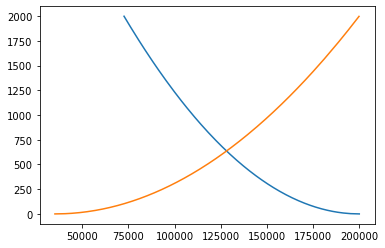

In [90]:
import matplotlib.pyplot as plt

plt.plot(Data_H_D['Quantity'][0:999],Data_H_D['price'][0:999])
plt.plot(Data_H_SP['Quantity'][0:999],Data_H_SP['price'][0:999])